# TP3 CNN
Réalisée par :
               Habib Achref
             

# 4. Construction du 1er réseau
## a. Importer les données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import backend as K
K.set_image_data_format('channels_first')
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Charger les données
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Reshape des données pour les adapter à la configuration de TensorFlow
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')


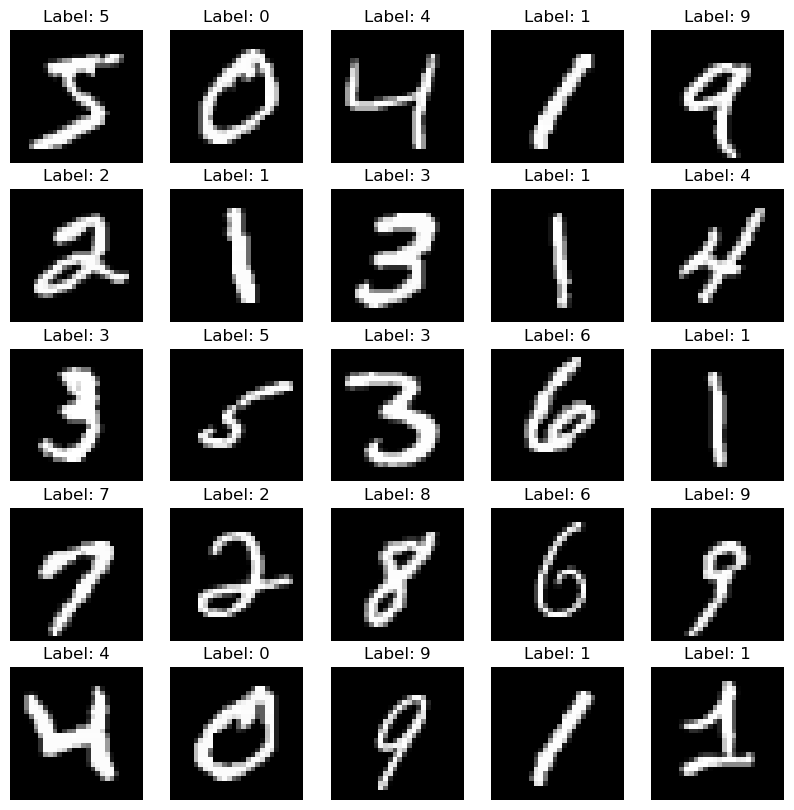

In [ ]:
# Affichage de quelques exemples d'images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# Convertir les étiquettes en encodage one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Nombre de classes (chiffres de 0 à 9)
num_classes = y_test.shape[1]

In [ ]:
def get_data_mnist():


    # Charger les données
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Remodeler les données pour être compatibles avec le modèle CNN
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

    # Encoder les étiquettes en encodage one-hot
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Nombre de classes (chiffres de 0 à 9)
    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes


<hr>

<hr>

<hr>

# b. Construire le modèle de CNN

In [ ]:
def small_model():
    # Création du modèle
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    # Compilation du modèle
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

<hr>

<hr>

<hr>

# c. Entrainer et évaluer notre Small CNN

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Entraînement du modèle
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

    # Évaluation du modèle sur les données de test
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    return history

## Question1

In [ ]:
# Créer le modèle
model = small_model()


In [ ]:
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()

In [ ]:
# Entraîner et évaluer le modèle
history = train_and_evaluate(model, X_train, y_train, X_test, y_test)

Epoch 1/10


300/300 [==============================] - 44s 144ms/step - loss: 0.5965 - accuracy: 0.9282 - val_loss: 0.1082 - val_accuracy: 0.9644
Epoch 2/10
300/300 [==============================] - 42s 141ms/step - loss: 0.0633 - accuracy: 0.9805 - val_loss: 0.0777 - val_accuracy: 0.9774
Epoch 3/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0859 - val_accuracy: 0.9763
Epoch 4/10
300/300 [==============================] - 42s 139ms/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.1001 - val_accuracy: 0.9772
Epoch 5/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.1121 - val_accuracy: 0.9748
Epoch 6/10
300/300 [==============================] - 42s 141ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.1239 - val_accuracy: 0.9779
Epoch 7/10
300/300 [==============================] - 42s 139ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.1164 - val_

 l'exactitude sur l'ensemble de validation soit légèrement inférieure à celle sur l'ensemble d'entraînement, elle reste élevée et les performances sur l'ensemble de test sont également très bonnes.

## Question2

In [ ]:
def print_model_error_rate(model, X_test, y_test):
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Model score : %.2f%%" % (scores[1]*100))
    print("Model error rate : %.2f%%" % (100-scores[1]*100))


In [ ]:
# Appel de la méthode pour évaluer le modèle
print_model_error_rate(model, X_test, y_test)


Model score : 97.91%
Model error rate : 2.09%


<hr>

<hr>

<hr>

# 5. Construction des 3 modèles après normalisation de données

## Question1

In [ ]:
def get_data_mnist2():
    # Chargement des données MNIST
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalisation des données
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    # Remodelage des données pour les rendre compatibles avec le modèle
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

    # Encodage one-hot des étiquettes de sortie
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes


In [ ]:
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist2()

## Question2

In [ ]:
# Créer le modèle
model2 = small_model()

# Entraîner et évaluer le modèle
history2 = train_and_evaluate(model2, X_train, y_train, X_test, y_test)

Epoch 1/10
300/300 [==============================] - 43s 141ms/step - loss: 0.2194 - accuracy: 0.9364 - val_loss: 0.0656 - val_accuracy: 0.9793
Epoch 2/10
300/300 [==============================] - 42s 139ms/step - loss: 0.0620 - accuracy: 0.9815 - val_loss: 0.0572 - val_accuracy: 0.9818
Epoch 3/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0495 - val_accuracy: 0.9837
Epoch 4/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0329 - accuracy: 0.9904 - val_loss: 0.0456 - val_accuracy: 0.9871
Epoch 5/10
300/300 [==============================] - 42s 139ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0471 - val_accuracy: 0.9863
Epoch 6/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0557 - val_accuracy: 0.9858
Epoch 7/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0516 - val_ac

 Les performances sont donc très similaires sur les deux ensembles de données, pas de overfitting

In [ ]:
# Appel de la méthode pour évaluer le modèle
print_model_error_rate(model2, X_test, y_test)

Model score : 98.48%
Model error rate : 1.52%


## Question3

In [ ]:
def medium_CNN():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [ ]:
# Créer le modèle
model3 = medium_CNN()

# Entraîner et évaluer le modèle
history3 = train_and_evaluate(model3, X_train, y_train, X_test, y_test)

Epoch 1/10
300/300 [==============================] - 16s 49ms/step - loss: 0.2412 - accuracy: 0.9315 - val_loss: 0.0742 - val_accuracy: 0.9780
Epoch 2/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.0491 - val_accuracy: 0.9831
Epoch 3/10
300/300 [==============================] - 16s 52ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.0408 - val_accuracy: 0.9870
Epoch 4/10
300/300 [==============================] - 16s 52ms/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0381 - val_accuracy: 0.9859
Epoch 5/10
300/300 [==============================] - 15s 49ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0325 - val_accuracy: 0.9886
Epoch 6/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0371 - val_accuracy: 0.9872
Epoch 7/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0326 - val_accuracy:

es résultats suggèrent que le modèle a bien appris à partir des données d'entraînement et est capable de généraliser efficacement sur de nouvelles données,

In [ ]:
# Appel de la méthode pour évaluer le modèle
print_model_error_rate(model3, X_test, y_test)

Model score : 98.98%
Model error rate : 1.02%


## Question4

In [ ]:
def large_CNN():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [ ]:
# Créer le modèle
model4 = large_CNN()

# Entraîner et évaluer le modèle
history4 = train_and_evaluate(model4, X_train, y_train, X_test, y_test)

Epoch 1/10
300/300 [==============================] - 16s 48ms/step - loss: 0.3190 - accuracy: 0.9051 - val_loss: 0.0796 - val_accuracy: 0.9732
Epoch 2/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0820 - accuracy: 0.9751 - val_loss: 0.0494 - val_accuracy: 0.9834
Epoch 3/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0552 - accuracy: 0.9835 - val_loss: 0.0364 - val_accuracy: 0.9881
Epoch 4/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.0345 - val_accuracy: 0.9885
Epoch 5/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0311 - val_accuracy: 0.9904
Epoch 6/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0291 - val_accuracy: 0.9912
Epoch 7/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0346 - val_accuracy:

 ces résultats suggèrent que le modèle est capable de bien apprendre à partir des données d'entraînement et de généraliser efficacement sur de nouvelles données

In [ ]:
# Appel de la méthode pour évaluer le modèle
print_model_error_rate(model4, X_test, y_test)

Model score : 99.08%
Model error rate : 0.92%


# 6. Sauvegarde et chargements des modèles Keras

In [ ]:
# This function saves a model on the drive using two files: a json and a h5
def save_keras_model(model, filename):
 # serialize model to JSON
 model_json = model.to_json()
 with open(filename+".json", "w") as json_file:
     json_file.write(model_json)
 # serialize weights to HDF5
 model.save_weights(filename+".h5")


In [ ]:
save_keras_model(model4,'TPCNN')

In [ ]:
from keras.models import model_from_json

#This function loads a model from two files : a json and a h5
# BE CAREFUL : the model NEEDS TO BE COMPILED before any use !
def load_keras_model(filename):
 # load json and create model
 json_file = open(filename+".json", 'r')
 loaded_model_json = json_file.read()
 json_file.close()
 loaded_model = model_from_json(loaded_model_json)
 # load weights into new model
 loaded_model.load_weights(filename+".h5")
 return loaded_model

In [ ]:
loaded_model=load_keras_model('TPCNN')

In [ ]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 24, 24)        780       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 12, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 10, 10)        4065      
                                                                 
 dropout_2 (Dropout)         (None, 15, 10, 10)        0         
                                                                 
 flatten_4 (Flatten)         (None, 1500)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               192128    
                                                      

1/1 [==============================] - 0s 37ms/step


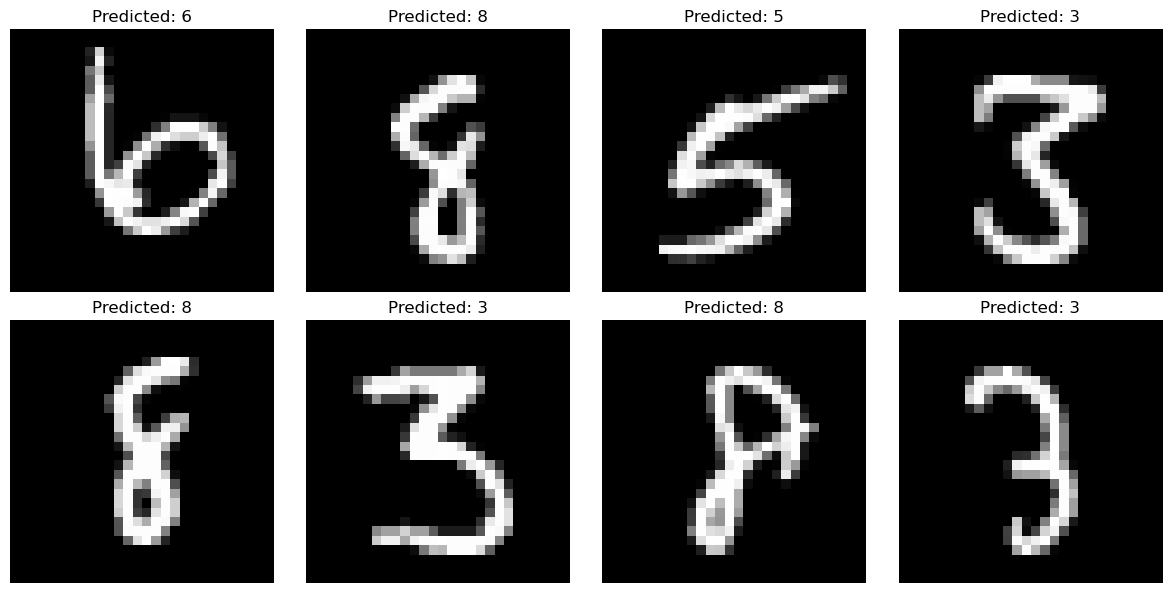

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

random_indices = np.random.choice(len(X_test), size=8, replace=False)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 4, i)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

    example = np.expand_dims(X_test[idx], axis=0) #ajoute 1 en indice 0
    prediction = model4.predict(example)
    predicted_class = np.argmax(prediction)  #'indice de la classe prédite

    plt.title(f'Predicted: {predicted_class}')

plt.tight_layout()
plt.show()